<a href="https://colab.research.google.com/github/mukteshsingh95/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization and graphical plotting
import seaborn as sns # for data visualization
import numpy as np # for manipulation of multi-dimensional arrays and matrices
import scipy # For metrics factorisation with svd
from scipy.sparse.linalg import svds
import re # For string manipulation
from IPython.display import display, Image # For displaying image
from sklearn.metrics.pairwise import cosine_similarity # For calculating cosine similarity

In [ ]:
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading dataset
Book_df=pd.read_csv("/content/drive/MyDrive/DATA/Books.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
rating_df = pd.read_csv("/content/drive/MyDrive/DATA/Ratings[1].csv")


In [ ]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
user_df = pd.read_csv("/content/drive/MyDrive/DATA/Users[1].csv")

In [ ]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
#Checking duplicate observation
Book_df.duplicated().sum()

0

In [ ]:
# Checking for duplicate ISBN
total_rows=Book_df.shape[0]
unique_isbn=len(Book_df["ISBN"].unique())
repeated_isbn=total_rows-unique_isbn
unique_title=len(Book_df["Book-Title"].unique())
repeated_title=total_rows-unique_title
print(f'number of repeated isbn: {repeated_isbn}')
print(f'number of repeated book title: {repeated_title}')

number of repeated isbn: 0
number of repeated book title: 29225


In [ ]:
#checking null values
Book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
#first 5 rows of rating_df dataset
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#information about rating_df dataset
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
#Checking duplicate observation
rating_df.duplicated().sum()

0

In [ ]:
#checking null values
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
#first 5 rows of user_df dataset
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
#Checking duplicate observation
user_df.duplicated().sum()

0

In [ ]:
#checking null values
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
# Creating dataframe for top 10 authors with highest number of books
top_authors=Book_df.groupby('Book-Author').agg({'Book-Title':'count'}).sort_values(by="Book-Title",ascending=False).head(10).reset_index()
top_authors.rename(columns = {'Book-Author':'Author','Book-Title':"count"},inplace=True)

top_authors
     

,Author,count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


Text(0, 0.5, 'Number Of Books')

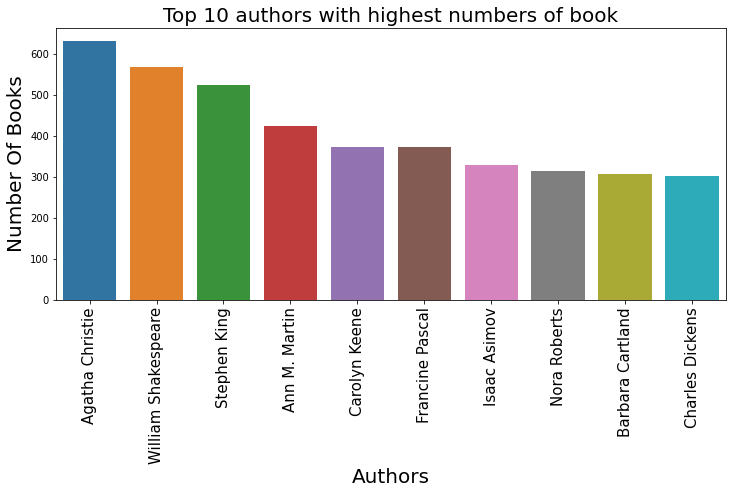

In [ ]:
# Plotting bar graph for top 10 authors with highest number of books
plt.figure(figsize=(12,5))
sns.barplot(data=top_authors, x="Author", y="count")
plt.title("Top 10 authors with highest numbers of book",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Authors",fontsize=20)
plt.ylabel("Number Of Books",fontsize=20)

# **Observation:** 
Agatha Christie is the Top author with highest numbers of books.

# **Unique** **values** **for** **year** **of** **publication** **column**

In [ ]:
# Unique values of year of publication column
Book_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
#Checking the rows with wrong value
Book_df.loc[(Book_df['Year-Of-Publication'] == 'DK Publishing Inc') | (Book_df['Year-Of-Publication'] == 'Gallimard'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# correct the 'Year of Publication' column
#ISBN = '0789466953'
Book_df.loc[Book_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
Book_df.loc[Book_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
Book_df.loc[Book_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
Book_df.loc[Book_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Book_df Come to Life(Level 4: Proficient Readers)"

#ISBN = '078946697X'
Book_df.loc[Book_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
Book_df.loc[Book_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
Book_df.loc[Book_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
Book_df.loc[Book_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began(Level 4: Proficient Readers)"

#ISBN = '2070426769'
Book_df.loc[Book_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
Book_df.loc[Book_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio"
Book_df.loc[Book_df.ISBN == '2070426769','Publisher'] = "Gallimard"
Book_df.loc[Book_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"


Book_df.loc[(Book_df.ISBN == '0789466953') | (Book_df.ISBN == '078946697X') | (Book_df.ISBN == '2070426769'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers'",Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#Converting Year-Of-Publication column from string to integer
Book_df['Year-Of-Publication'] = Book_df['Year-Of-Publication'].apply(lambda x: int(x))

In [ ]:
#fill the wrong entries with Nan values.
Book_df.loc[(Book_df['Year-Of-Publication'] >= 2006) | (Book_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN


#replacing NaN values with median 
Book_df['Year-Of-Publication'].fillna(round(Book_df['Year-Of-Publication'].median()), inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year-Of-Publication', ylabel='Density'>

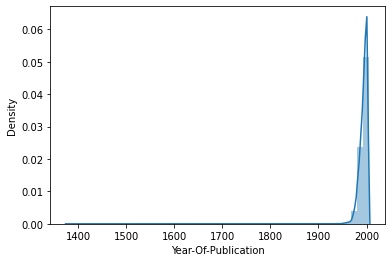

In [ ]:
# Distplot for Year of Publication
sns.distplot(Book_df['Year-Of-Publication'])